## self-gun 抛体运动模拟-采用欧拉方法
### 已知：初速度；发射角范围；
### 考虑：空气阻力；海拔高度-空气密度变化；
### 忽略：科里奥利力；
### 求解水平最远射程即为self-gun的射程

#### 抛体(炮弹)运动是牛顿运动方程处理力学问题的典范。在不计入空气阻力的情况下，抛体只受到重力，因而其运动规律由牛顿运动方程给出$\begin{equation}\left\{\begin{aligned}  \frac{\mathrm{d}^{2}x}{\mathrm{d}t^2}&=0\\\frac{\mathrm{d}^{2}y}{\mathrm{d}t^2}&=-g\\\end{aligned}\right. \tag{1}\end{equation}$其中g是重力加速度。这是一个十分简单的方程，容易解析的求解。但倘若考虑其他的力(例如空气阻力等)，则还需在方程右边增补其他项，这将会使得实际抛体的运动情况更加复杂，很多情况下实际抛体的运动方程可以写为$\begin{equation}\left\{\begin{aligned}\frac{\mathrm{d}^{2}x}{\mathrm{d}t^2}&=f_x(x,y,v_x,v_y;t)  \\\frac{\mathrm{d}^{2}y}{\mathrm{d}t^2}&=-g+f_y(x,y,v_x,v_y;t)  \\\end{aligned}\right. \tag{2}\end{equation}$其中,$f_x(x,y,v_x,v_y;t)$,$f_y(x,y,v_x,v_y;t)$是单位质量抛体在x，y轴方向受力，其形式需根据实际情况确定。在许多情况下，仅考虑空气阻力对速度二次方的依赖项，再考虑空气是热的不良导体，建立大气绝热模型可以具体给出$f_x$，$f_y$的形式为$\begin{equation}\left\{\begin{aligned}  f_x&=-B(1-\frac{ay}{T_0})^{\alpha}vv_x/m  \\  f_x&=-B(1-\frac{ay}{T_0})^{\alpha}vv_y/m\\\end{aligned}\right. \tag{3}\end{equation}$其中m为抛体质量，B是不显著依赖于抛体性质和状态的常数，α对空气约为，T是热力学温度，而a是经验数，约是$6.5\times10^{-3}\mathrm{K/m}$。因此，方程组结合一定的初始条件就完全确定了抛体的运动状态

#### 数值方法求解，二阶方程降阶，并将微分近似差分：$\begin{equation}\left\{\begin{aligned}  x_{i+1}&=v_{x,i}\Delta t+x_{i}  \\  v_{x,i+1}&=f_x \Delta t+v_{x,i}  \\y_{i+1}&=v_{y,i}\Delta t+y_{i}  \\v_{y,i+1}&=(-g+f_x) \Delta t+v_{y,i} \\\end{aligned}\right. \tag{4}\end{equation}$欧拉法每一步的误差量级是$\Delta t^2$，而在给定总时间内的总体误差将是$\Delta t$量级，因此适当缩小步长$\Delta t$将有助于提高运算精度，但往往会使计算时间以$\frac{1}{\Delta t}$增加，因此需要权衡两者利弊，取一在给定时间不产生显著误差的的步长即可.

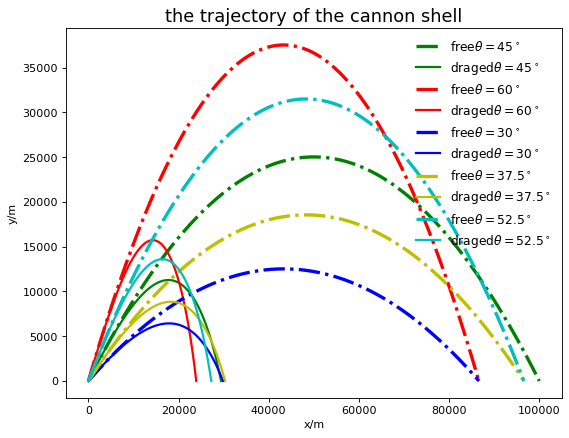

In [7]:
#不考虑海拔,考虑空气：
#取 initial $V_{x}=V_{y}=700m/s$
import matplotlib.pyplot as plt
import math

g=9.8
b2m=4e-5
class flight_state:
    def __init__(self, _x=0,_y=0,_vx=0,_vy=0,_t=0):
        self.x=_x
        self.y=_y
        self.vx=_vx
        self.vy=_vy
        self.t=_t
class Cannon:
    def __init__(self,_fs=flight_state(0,0,0,0,0),_dt=0.1):
        self.cannon_flight_state=[]
        self.cannon_flight_state.append(_fs)
        self.dt=_dt
        #print self.cannon_flight_state[-1].x,self.cannon_flight_state[-1].y
    def next_state(self,current_state):
        global g
        next_x=current_state.x+current_state.vx*self.dt        
        next_vx=current_state.vx
        next_y=current_state.y+current_state.vy*self.dt
        next_vy=current_state.vy-g*self.dt
        next_t=current_state.t+self.dt
        return flight_state(next_x,next_y,next_vx,next_vy,next_t)
    def shot(self):
        while not(self.cannon_flight_state[-1].y<0):
            self.cannon_flight_state.append(self.next_state(self.cannon_flight_state[-1]))
        r = - self.cannon_flight_state[-2].y / self.cannon_flight_state[-1].y
        self.cannon_flight_state[-1].x = (self.cannon_flight_state[-2].x + r * self.cannon_flight_state[-1].x) / (r + 1)
        self.cannon_flight_state[-1].y = 0
        #print self.cannon_flight_state[-1].x,self.cannon_flight_state[-1].y
    def show_trace(self):
        global x,y
        x=[]
        y=[]
        for fs in self.cannon_flight_state:
            x.append(fs.x)
            y.append(fs.y)
class Drag_cannon(Cannon):
    def next_state(self,current_state):
        global g,b2m
        v=math.sqrt(current_state.vx**2+current_state.vy**2)
        next_x=current_state.x+current_state.vx*self.dt
        next_vx=current_state.vx-b2m*v*current_state.vx*self.dt
        next_y=current_state.y+current_state.vy*self.dt
        next_vy=current_state.vy-g*self.dt-b2m*v*current_state.vy*self.dt
        next_t=current_state.t+self.dt
        return flight_state(next_x,next_y,next_vx,next_vy,next_t)

plt.figure(figsize=(8,6), dpi=80)

c1=Cannon(flight_state(0,0,700,700,0),_dt=0.1)
c1.shot()
c1.show_trace()
plt.plot(x,y,'g-.',linewidth=3.0,label=r'free$\theta=45^\circ$')
plt.legend(loc='best',prop={'size':11},frameon=False)
c1_final=x[-1]
d1=Drag_cannon(flight_state(0,0,700,700,0),_dt=0.1)
d1.shot()
d1.show_trace()
plt.plot(x,y,'g',linewidth=2.0,label=r'draged$\theta=45^\circ$')
plt.legend(loc='best',prop={'size':11},frameon=False)
d1_final=x[-1]

c2=Cannon(flight_state(0,0,700*2**0.5*math.cos(60*math.pi/180),700*2**0.5*math.sin(60*math.pi/180)))
c2.shot()
c2.show_trace()
plt.plot(x,y,'r-.',linewidth=3.0,label=r'free$\theta=60^\circ$')
plt.legend(loc='best',prop={'size':11},frameon=False)
c2_final=x[-1]
d2=Drag_cannon(flight_state(0,0,700*2**0.5*math.cos(60*math.pi/180),700*2**0.5*math.sin(60*math.pi/180)))
d2.shot()
d2.show_trace()
plt.plot(x,y,'r',linewidth=2.0,label=r'draged$\theta=60^\circ$')
plt.legend(loc='best',prop={'size':11},frameon=False)
d2_final=x[-1]

c3=Cannon(flight_state(0,0,700*2**0.5*math.cos(30*math.pi/180),700*2**0.5*math.sin(30*math.pi/180)))
c3.shot()
c3.show_trace()
plt.plot(x,y,'b-.',linewidth=3.0,label=r'free$\theta=30^\circ$')
legend3=plt.legend(loc='best',prop={'size':11},frameon=False)
c3_final=x[-1]
d3=Drag_cannon(flight_state(0,0,700*2**0.5*math.cos(30*math.pi/180),700*2**0.5*math.sin(30*math.pi/180)))
d3.shot()
d3.show_trace()
plt.plot(x,y,'b',linewidth=2.0,label=r'draged$\theta=30^\circ$')
plt.legend(loc='best',prop={'size':11},frameon=False)
d3_final=x[-1]

c4=Cannon(flight_state(0,0,700*2**0.5*math.cos(37.5*math.pi/180),700*2**0.5*math.sin(37.5*math.pi/180)))
c4.shot()
c4.show_trace()
plt.plot(x,y,'y-.',linewidth=3.0,label=r'free$\theta=37.5^\circ$')
plt.legend(loc='best',prop={'size':11},frameon=False)
c4_final=x[-1]
d4=Drag_cannon(flight_state(0,0,700*2**0.5*math.cos(37.5*math.pi/180),700*2**0.5*math.sin(37.5*math.pi/180)))
d4.shot()
d4.show_trace()
plt.plot(x,y,'y',linewidth=2.0,label=r'draged$\theta=37.5^\circ$')
plt.legend(loc='best',prop={'size':11},frameon=False)
d4_final=x[-1]

c5=Cannon(flight_state(0,0,700*2**0.5*math.cos(52.5*math.pi/180),700*2**0.5*math.sin(52.5*math.pi/180)))
c5.shot()
c5.show_trace()
plt.plot(x,y,'c-.',linewidth=3.0,label=r'free$\theta=52.5^\circ$')
plt.legend(loc='best',prop={'size':11},frameon=False)
c5_final=x[-1]
d5=Drag_cannon(flight_state(0,0,700*2**0.5*math.cos(52.5*math.pi/180),700*2**0.5*math.sin(52.5*math.pi/180)))
d5.shot()
d5.show_trace()
plt.plot(x,y,'c',linewidth=2.0,label=r'draged$\theta=52.5^\circ$')
plt.legend(loc='best',prop={'size':11},frameon=False)
d5_final=x[-1]

plt.xlabel('x/m')
plt.ylabel('y/m')
plt.title('the trajectory of the cannon shell',fontsize=16)
plt.savefig('cannon shell .png')
plt.show()

#### 考虑海拔对空气密度影响：$\rho=\rho_0(1-\frac{ay}{T_0})^\alpha\\F_{drag}^*=\frac{\rho}{\rho_0}F_{drag}(y=0)$

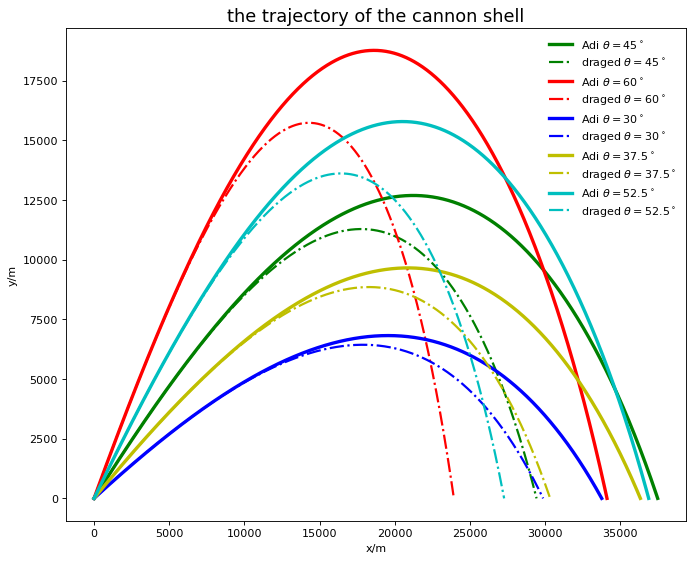

In [4]:
import matplotlib.pyplot as plt
import math

g=9.8
b2m=4e-5
class flight_state:
    def __init__(self, _x=0,_y=0,_vx=0,_vy=0,_t=0):
        self.x=_x
        self.y=_y
        self.vx=_vx
        self.vy=_vy
        self.t=_t
class Cannon:
    def __init__(self,_fs=flight_state(0,0,0,0,0),_dt=0.1):
        self.cannon_flight_state=[]
        self.cannon_flight_state.append(_fs)
        self.dt=_dt
        #print self.cannon_flight_state[-1].x,self.cannon_flight_state[-1].y
    def next_state(self,current_state):
        global g
        next_x=current_state.x+current_state.vx*self.dt        
        next_vx=current_state.vx
        next_y=current_state.y+current_state.vy*self.dt
        next_vy=current_state.vy-g*self.dt
        next_t=current_state.t+self.dt
        return flight_state(next_x,next_y,next_vx,next_vy,next_t)
    def shot(self):
        while not(self.cannon_flight_state[-1].y<0):
            self.cannon_flight_state.append(self.next_state(self.cannon_flight_state[-1]))
        r = - self.cannon_flight_state[-2].y / self.cannon_flight_state[-1].y
        self.cannon_flight_state[-1].x = (self.cannon_flight_state[-2].x + r * self.cannon_flight_state[-1].x) / (r + 1)
        self.cannon_flight_state[-1].y = 0
        #print self.cannon_flight_state[-1].x,self.cannon_flight_state[-1].y
    def show_trace(self):
        global x,y
        x=[]
        y=[]
        for fs in self.cannon_flight_state:
            x.append(fs.x)
            y.append(fs.y)
class Drag_cannon(Cannon):
    def next_state(self,current_state):
        global g,b2m
        v=math.sqrt(current_state.vx**2+current_state.vy**2)
        next_x=current_state.x+current_state.vx*self.dt
        next_vx=current_state.vx-b2m*v*current_state.vx*self.dt
        next_y=current_state.y+current_state.vy*self.dt
        next_vy=current_state.vy-g*self.dt-b2m*v*current_state.vy*self.dt
        next_t=current_state.t+self.dt
        return flight_state(next_x,next_y,next_vx,next_vy,next_t)
class Adi_drag_cannon(Drag_cannon):
    def next_state(self,current_state):
        global g,b2m
        #b=[]
        #b.append(b2m)
        v=math.sqrt(current_state.vx**2+current_state.vy**2)
        #b2m=b2m*(1-0.0065*current_state.y/300)**2.5
        next_x=current_state.x+current_state.vx*self.dt
        next_vx=current_state.vx-b2m*(1-0.0065*current_state.y/300)**2.5*v*current_state.vx*self.dt
        next_y=current_state.y+current_state.vy*self.dt
        next_vy=current_state.vy-g*self.dt-b2m*(1-0.0065*current_state.y/300)**2.5*v*current_state.vy*self.dt
        next_t=current_state.t+self.dt
        #print b2m*(1-0.0065*current_state.y/300)**2.5
        return flight_state(next_x,next_y,next_vx,next_vy,next_t)

plt.figure(figsize=(10,8),dpi=80)

c1=Adi_drag_cannon(flight_state(0,0,700*2**0.5*math.cos(45*math.pi/180),700*2**0.5*math.sin(45*math.pi/180)))
c1.shot()
c1.show_trace()
plt.plot(x,y,'g',linewidth=3.0,label=r'Adi $\theta=45^\circ$')
plt.legend(loc='best',prop={'size':10},frameon=False)
c1_final=x[-1]
d1=Drag_cannon(flight_state(0,0,700*2**0.5*math.cos(45*math.pi/180),700*2**0.5*math.sin(45*math.pi/180)))
d1.shot()
d1.show_trace()
plt.plot(x,y,'g-.',linewidth=2.0,label=r'draged $\theta=45^\circ$')
plt.legend(loc='best',prop={'size':10},frameon=False)
d1_final=x[-1]

c2=Adi_drag_cannon(flight_state(0,0,700*2**0.5*math.cos(60*math.pi/180),700*2**0.5*math.sin(60*math.pi/180)))
c2.shot()
c2.show_trace()
plt.plot(x,y,'r',linewidth=3.0,label=r'Adi $\theta=60^\circ$')
plt.legend(loc='best',prop={'size':10},frameon=False)
c2_final=x[-1]
d2=Drag_cannon(flight_state(0,0,700*2**0.5*math.cos(60*math.pi/180),700*2**0.5*math.sin(60*math.pi/180)))
d2.shot()
d2.show_trace()
plt.plot(x,y,'r-.',linewidth=2.0,label=r'draged $\theta=60^\circ$')
plt.legend(loc='best',prop={'size':10},frameon=False)
d2_final=x[-1]

c3=Adi_drag_cannon(flight_state(0,0,700*2**0.5*math.cos(30*math.pi/180),700*2**0.5*math.sin(30*math.pi/180)))
c3.shot()
c3.show_trace()
plt.plot(x,y,'b',linewidth=3.0,label=r'Adi $\theta=30^\circ$')
legend3=plt.legend(loc='best',prop={'size':10},frameon=False)
c3_final=x[-1]
d3=Drag_cannon(flight_state(0,0,700*2**0.5*math.cos(30*math.pi/180),700*2**0.5*math.sin(30*math.pi/180)))
d3.shot()
d3.show_trace()
plt.plot(x,y,'b-.',linewidth=2.0,label=r'draged $\theta=30^\circ$')
plt.legend(loc='best',prop={'size':10},frameon=False)
d3_final=x[-1]

c4=Adi_drag_cannon(flight_state(0,0,700*2**0.5*math.cos(37.5*math.pi/180),700*2**0.5*math.sin(37.5*math.pi/180)))
c4.shot()
c4.show_trace()
plt.plot(x,y,'y',linewidth=3.0,label=r'Adi $\theta=37.5^\circ$')
plt.legend(loc='best',prop={'size':10},frameon=False)
c4_final=x[-1]
d4=Drag_cannon(flight_state(0,0,700*2**0.5*math.cos(37.5*math.pi/180),700*2**0.5*math.sin(37.5*math.pi/180)))
d4.shot()
d4.show_trace()
plt.plot(x,y,'y-.',linewidth=2.0,label=r'draged $\theta=37.5^\circ$')
plt.legend(loc='best',prop={'size':10},frameon=False)
d4_final=x[-1]

c5=Adi_drag_cannon(flight_state(0,0,700*2**0.5*math.cos(52.5*math.pi/180),700*2**0.5*math.sin(52.5*math.pi/180)))
c5.shot()
c5.show_trace()
plt.plot(x,y,'c',linewidth=3.0,label=r'Adi $\theta=52.5^\circ$')
plt.legend(loc='best',prop={'size':10},frameon=False)
c5_final=x[-1]
d5=Drag_cannon(flight_state(0,0,700*2**0.5*math.cos(52.5*math.pi/180),700*2**0.5*math.sin(52.5*math.pi/180)))
d5.shot()
d5.show_trace()
plt.plot(x,y,'c-.',linewidth=2.0,label=r'draged $\theta=52.5^\circ$')
plt.legend(loc='best',prop={'size':10},frameon=False)
d5_final=x[-1]

plt.xlabel('x/m')
plt.ylabel('y/m')
plt.title('the trajectory of the cannon shell',fontsize=16)
plt.savefig('adi-draged cannon.png')
plt.show()

#### 发射角度和水平射程的距离之间关系

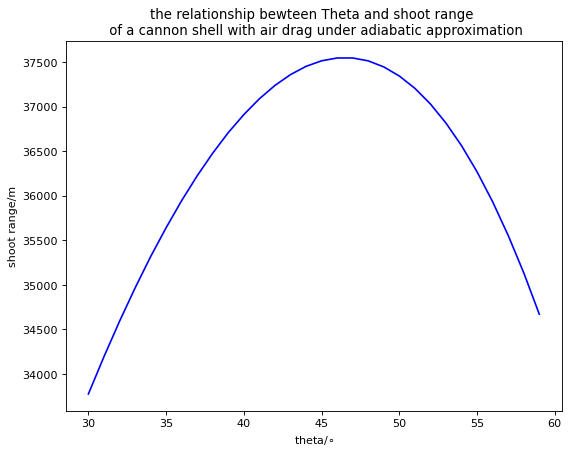

37547.19502077164


In [8]:
import math
import matplotlib.pyplot as plt
x=[]
y=[]
v_x=[]
v_y=[]
t=[]
i=[]
theta_list=[]
x_list=[]
v=[]
dt=0.01
g=-9.8
v_init=700*2**0.5   #取 initial $V_{x}=V_{y}=700m/s$
B=0.00004
y_0 = 0.0001
a = 6.5*10**(-3)
b =2.5
T_0 = 300
for theta in range(30,60):
    i.append(0);v.append(v_init)
    v_x.append(v_init*math.cos(theta*math.pi/180))
    v_y.append(v_init*math.sin(theta*math.pi/180))
    x.append(0.0)
    y.append(0.0)
    t.append(0.0)
    while y[-1]>=0.0:
        v.append(math.sqrt(v_x[-1]**2+v_y[-1]**2))
        x_tmp=x[-1]+dt*v_x[-1]
        x.append(x_tmp)
        v_x_tmp=v_x[-1]-((1-a*y[-1]/T_0)**b)*B*v[-1]*v_x[-1]*dt
        v_x.append(v_x_tmp)
        y_tmp=y[-1]+dt*v_y[-1]
        y.append(y_tmp)
        v_y_tmp=v_y[-1]+dt*g-((1-a*y[-1]/T_0)**b)*B*v[-1]*v_y[-1]*dt
        v_y.append(v_y_tmp)
        i_tmp=i[-1]+1
        i.append(i_tmp)
        t.append(dt*i[-1])  
    theta_list.append(theta);x_list.append(x[-1])

plt.figure(figsize=(8,6),dpi=80)

plt.plot(theta_list,x_list,'b' , label="(theta,shoot range)")
plt.xlabel("theta/$\circ$")
plt.ylabel("shoot range/m")
plt.title('the relationship bewteen Theta and shoot range \n of a cannon shell with air drag under adiabatic approximation')

plt.savefig('adi drag.png')
plt.show()
print(max(x_list))

#### 考虑绝热近似时，在47°时水平射程最远